In [47]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib
from matplotlib.ticker import (AutoMinorLocator, MultipleLocator)

In [6]:
year = []
month = []
day = []
temperature = []
with open('weather.txt', 'r') as f:
    for line in f.readlines():
        year.append(int(line.split()[0]))
        month.append(int(line.split()[1]))
        day.append(int(line.split()[2]))
        temperature.append(float(line.split()[3]))

In [8]:
df = pd.DataFrame({'year': year, 'month': month, 'day': day, 'temperature': temperature})

In [14]:
def preprocessing(df, month):
    return df[df.month==month].groupby('day').temperature.agg(['min', 'max', 'mean']).reset_index()

In [15]:
view = preprocessing(df, 4)

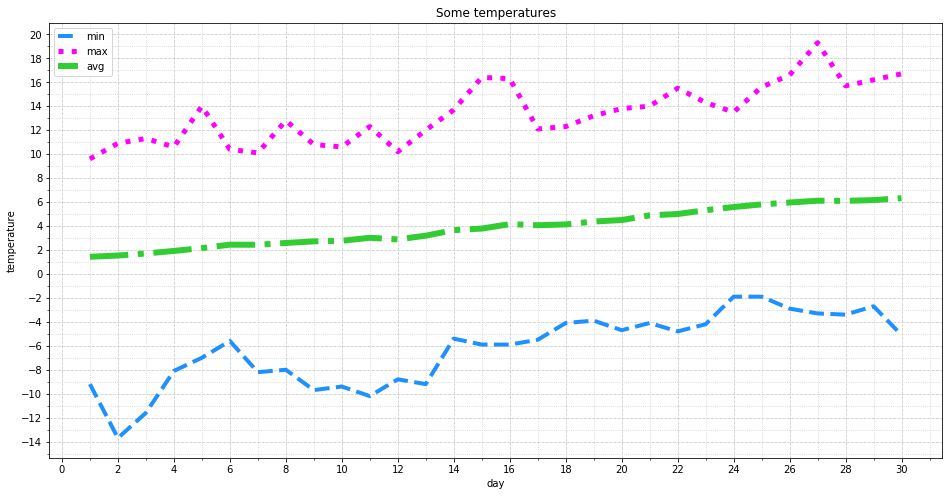

In [51]:
fig, ax = plt.subplots(figsize=(16, 8))
ax.xaxis.set_major_locator(MultipleLocator(2))
ax.yaxis.set_major_locator(MultipleLocator(2))
ax.xaxis.set_minor_locator(AutoMinorLocator(2))
ax.yaxis.set_minor_locator(AutoMinorLocator(2))
ax.grid(which='major', color='#CCCCCC', linestyle='--')
ax.grid(which='minor', color='#CCCCCC', linestyle=':')
fig = ax.plot('day', 'min', data=view, label='min', linestyle='--', linewidth=4, color='dodgerblue')
fig = ax.plot('day', 'max', data=view, label='max', linestyle=':', linewidth=5, color='magenta')
fig = ax.plot('day', 'mean', data=view, label='avg', linestyle='-.', linewidth=6, color='limegreen')
ax.set_xlabel('day')
ax.set_ylabel('temperature')
ax.set_title('Some temperatures')
ax.legend()